In [1]:
import warnings
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
import schemdraw.elements as elm
elm.style(elm.STYLE_IEC)

from ccsympy import *

init_printing(use_unicode=False, wrap_line=True)
warnings.simplefilter('ignore')
#warnings.resetwarnings()

## core.ExtendedElements(Elements=None, row=1, col=1, sym=None, impedance=0)
**Elements**: list of *core.ExtendedElements* 
- Object from *schemdraw.elements* for termination

**row**: *int* or *float*, **col**: *int* or *float*
- Size of the element for drawing

**sym**: *sympy.Symbol*
- Related to the element

**impedance**: object from *sympy.core*
- Impedance of the element

### self.series(Elements)
**Elements**: *core.ExtendedElements* or list of that
- Construct ExtendedElements from the pieces in Elements in series format.

### self.parallel(Elements)
**Elements**: *core.ExtendedElements* or list of that
- Construct ExtendedElements from the pieces in Elements in parallel format.

## subclass of core.ExtendedElements
- Dot
- Line
- Capacitance
- Conductance
- Resistance

In [2]:
EE = ExtendedElements()
C, EE_C = EE_Variable(Capacitance, r'C', real=True)
print('type(C) = %s\ntype(EE_C) = %s' % (type(C), type(EE_C)))
print('EE_C.Elements = %s' % EE_C.Elements)
print('EE_C.row = %s' % EE_C.row)
print('EE_C.col = %s' % EE_C.col)
print('EE_C.sym = %s' % EE_C.sym)
EE_C.impedance

type(C) = <class 'sympy.core.symbol.Symbol'>
type(EE_C) = <class 'core.Capacitance'>
EE_C.Elements = <class 'schemdraw.elements.twoterm.Capacitor'>
EE_C.row = 1
EE_C.col = 1
EE_C.sym = C


type(a) = <class 'core.ExtendedElements'>
a.Elements = [C_\mathrm{ox}, [C_\mathrm{x}, C_\mathrm{S}, [R_\mathrm{it}, C_\mathrm{it}]], None]
a.row = 6
a.col = 4
a.sym = [C_\mathrm{ox}, [C_\mathrm{x}, C_\mathrm{S}, [R_\mathrm{it}, C_\mathrm{it}]], None]


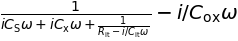

In [3]:
a = EE.series([EE_Cox, [EE_Cx, EE_CS, [EE_Rit, EE_Cit]], WIRE])
print('type(a) = %s' % type(a))
print('a.Elements = %s' % a.Elements)
print('a.row = %s' % a.row)
print('a.col = %s' % a.col)
print('a.sym = %s' % a.sym)
a.impedance

## function.EE_solve_complex(param, el, eq=[])
**param**: *sympy.Symbol*
- To be solved

**el**: list of *core.ExtendedElements*
- el[0].impedance = el[1].impedance

**eq**: list of *sympy.Eq*
- Additional equation



C_\mathrm{ox} = C_\mathrm{m} + \frac{G_\mathrm{m}^{2}}{C_\mathrm{m} \omega^{2}}
R_\mathrm{s} = \frac{G_\mathrm{m}}{C_\mathrm{m}^{2} \omega^{2} + G_\mathrm{m}^{2}}




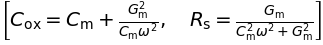

In [4]:
b = EE.series([WIRE, [EE_Cm, EE_Gm], WIRE])
c = EE.series([EE_Cox, EE_Rs, WIRE])
eqs = EE_solve_complex([Cox, Rs], [b, c], verbose=True)
eqs

## function.decode_Eq(param, eqs)
**param**: *sympy.Symbol*<br>
**eqs**: *sympy.Eq* or list of *sympy.Eq*
- Extruct param from eqs.

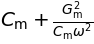

In [5]:
cox = decode_Eq(Cox, eqs)
cox

## function.EE_subs(param, func)
**param**: list of tuple(*sympy.Symbol*, *value*)<br>
**func**: *core.ExtendedElements* or object from *sympy.core*
- If func is *core.ExtendedElements*, **impedance** attribute will be adopted.

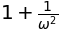

In [6]:
cox_ = EE_subs([(Cm, 1), (Gm, 1)], cox)
cox_

## function.EE_lambdify(param, func)
**param**: list of tuple(*sympy.Symbol*, *value*)<br>
**func**: *core.ExtendedElements* or object from *sympy.core*
- If func is *core.ExtendedElements*, **impedance** attribute will be adopted.

In [7]:
fw = EE_lambdify([w, Cm, Gm], cox)
fw(1, 1, 1)

## drawing.CircuitArray(\*args, \*\*kwargs)
### self.\_\_init\_\_(\*args, \*\*kwargs) = super().\_\_init\_\_(\*args, \*\*kwargs)

### self.series(Array, d='down')
**Array**: *core.ExtendedElements*, **d**: 'down', 'up', 'right', 'left'
- Drawing the elements in Array in series format.

### self.parallel(Array, d='down')
**Array**: *core.ExtendedElements*, **d**: 'down', 'up', 'right', 'left'
- Drawing the elements in Array in parallel format.

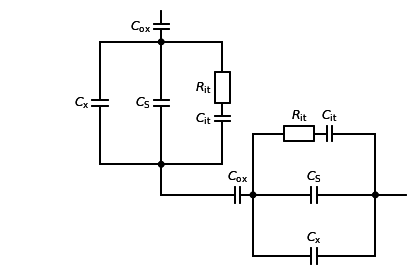

In [8]:
CA = CircuitArray()
CA.series(a, 'down')
CA.series(WIRE, 'right')
CA.series(WIRE, 'right')
CA.series(a, 'right')
CA.save('sample.svg')
CA.draw()

## sample.svg
#### [Click to see](https://github.com/tmiyao/ccsympy/blob/main/sample.svg)